In [79]:
# Import necessary libraries
import re
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [80]:
# Read data from the given .csv file
df = pd.read_csv('cleaned_retractions_new_records_V10.csv')
df.iloc[:,:11].head()

,Record ID,Title,Subject,Institution,Journal,Publisher,Country,Author,ArticleType,RetractionDate,OriginalPaperDate
0,50872,Evidence for genetic HIV variants from detecti...,(BLS) Biology - General;(BLS) Genetics;(HSC) M...,"Skin Clinic, Ruprecht-Karls-Universitat, 6900 ...",Lancet,Elsevier,Germany,Helmut NÃ¤her;Teresa SchÃ¼le;Detlef Petzoldt,Research Article;,16/05/1992,24/08/1991
1,50918,Preliminary report: effects of interleukin-1 o...,(BLS) Biology - Cancer;(HSC) Medicine - Oncolo...,"Surgical Metabolism Laboratory, Department of ...",Lancet,Elsevier,United States,Anand Tewari;H Fletcher Starnes Jr;William C B...,Clinical Study;,22/08/1992,22/09/1990
2,50870,Identification by Anti-idiotype Antibodies of ...,(BLS) Biology - Cellular;(BLS) Biology - Molec...,Cell Biology and Biological Structures Program...,Nature,Nature Publishing Group,Germany,David Vaux;John Tooze;Stephen Fuller,Research Article;,26/11/1992,07/06/1990
3,52675,Value of HIV transmembrane glycoprotein oligom...,(BLS) Biology - Molecular;(HSC) Medicine - Dru...,"Diagnostics Pasteur, 3 Bb, Raymond PoincarÃ©, ...",AIDS Research and Human Retroviruses,Mary Ann Liebert,France,A Sanjuan;Y Quesneau;JF Delagneau;F Brun-Vezinet,Letter;,08/10/1992,07/10/1991
4,52484,Molecular cloning and sequencing of cDNA encod...,(BLS) Biology - General;(BLS) Biology - Molecu...,"Department of Pharmacology, Tokyo Metropolitan...",The Journal of Biological Chemistry,American Society for Biochemistry and Molecula...,Japan,Akio Yamakawa;Makoto Nishizawa;Kousaku T Fujiw...,Research Article;,15/12/1992,15/09/1991


In [81]:
df.iloc[:,11:].head()

,Reason,CitationCount,SJR Best Quartile,SJR,H index,TimeToRetraction,AuthorCount,SubjectCount,ReasonCount,Reason_group,CountryCount,IsInternationalCollaboration,ArticleAge,IsPaywalled,LevelOfSeriousness
0,Error in Results and/or Conclusions;,0,Q5,3.785518,338.990909,266,3,5,2,Scientific error and no academic misconduct,1,0,11849,1,Less serious
1,Falsification/Fabrication of Data;Investigatio...,1,Q5,3.785518,338.990909,700,3,4,5,Scientific error and academic misconduct;No sc...,1,0,12185,1,The most serious
2,Error in Data;Error in Image;Unreliable Results;,8,Q1,18.509000,1391.000000,903,3,4,4,Scientific error and no academic misconduct,1,0,12292,0,Less serious
3,Error in Methods;Results Not Reproducible;,0,Q3,0.542000,98.000000,367,4,5,3,Scientific error and no academic misconduct;No...,1,0,11805,1,Less serious
4,Error in Analyses;Error in Methods;Error in Re...,2,Q5,3.785518,338.990909,457,7,3,4,Scientific error and no academic misconduct,1,0,11827,0,Less serious


## Feature Engineering 

### 'Subject'

In [82]:
def extract_and_remove_duplicates(subject):
    # Use regex to extract values inside parentheses
    values_in_parentheses = re.findall(r'\(([^)]*)\)', subject)
    seen = set()
    result = []

    for value in values_in_parentheses:
        if value in seen:
            continue
        seen.add(value)
        result.append(value)

    # Join the unique values with semicolons
    return ";".join(result)

# Apply the function to the 'Subject' column
df['Subject'] = df['Subject'].apply(extract_and_remove_duplicates)

# Display the resulting column
df['Subject']

0       BLS;HSC
1       BLS;HSC
2       BLS;HSC
3       BLS;HSC
4           BLS
         ...   
1856        BLS
1857        BLS
1858        HSC
1859        BLS
1860    BLS;HSC
Name: Subject, Length: 1861, dtype: object

## Encoding categorical data to numerical data

### Features that are binary data

Already converted to '0' and '1' in the data wrangling file.

In [83]:
df[['IsPaywalled', 'IsInternationalCollaboration']].head()

,IsPaywalled,IsInternationalCollaboration
0,1,0
1,1,0
2,0,0
3,1,0
4,0,0


### Encode target variable which is an ordinal data

In [84]:
# Initialize the OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

# Fit and transform the 'LevelOfSeriousness' column and replace it
df['LevelOfSeriousness'] = ordinal_encoder.fit_transform(df[['LevelOfSeriousness']])
df['LevelOfSeriousness']

0       0.0
1       3.0
2       0.0
3       0.0
4       0.0
       ... 
1856    3.0
1857    3.0
1858    1.0
1859    0.0
1860    1.0
Name: LevelOfSeriousness, Length: 1861, dtype: float64

In [85]:
# Initialize the OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

# Fit and transform the 'LevelOfSeriousness' column and replace it
df['SJR Best Quartile'] = ordinal_encoder.fit_transform(df[['SJR Best Quartile']])
df['SJR Best Quartile']

0       4.0
1       4.0
2       0.0
3       2.0
4       4.0
       ... 
1856    4.0
1857    4.0
1858    0.0
1859    1.0
1860    1.0
Name: SJR Best Quartile, Length: 1861, dtype: float64

### Features that are nominal data

#### Label Encoding

We apply label encoding which replaces each category in the dataset.

In [86]:
# Identify nominal features to apply label encoding
nominal_features = ['Journal', 'ArticleType']

# Initialize the LabelEncoder
label_encoders = {feature: LabelEncoder() for feature in nominal_features}

# Apply label encoding to each nominal feature
for feature in nominal_features:
    df[feature] = label_encoders[feature].fit_transform(df[feature])

# Display the resulting DataFrame
df

,Record ID,Title,Subject,Institution,Journal,Publisher,Country,Author,ArticleType,RetractionDate,...,TimeToRetraction,AuthorCount,SubjectCount,ReasonCount,Reason_group,CountryCount,IsInternationalCollaboration,ArticleAge,IsPaywalled,LevelOfSeriousness
0,50872,Evidence for genetic HIV variants from detecti...,BLS;HSC,"Skin Clinic, Ruprecht-Karls-Universitat, 6900 ...",457,Elsevier,Germany,Helmut NÃ¤her;Teresa SchÃ¼le;Detlef Petzoldt,22,16/05/1992,...,266,3,5,2,Scientific error and no academic misconduct,1,0,11849,1,0.0
1,50918,Preliminary report: effects of interleukin-1 o...,BLS;HSC,"Surgical Metabolism Laboratory, Department of ...",457,Elsevier,United States,Anand Tewari;H Fletcher Starnes Jr;William C B...,7,22/08/1992,...,700,3,4,5,Scientific error and academic misconduct;No sc...,1,0,12185,1,3.0
2,50870,Identification by Anti-idiotype Antibodies of ...,BLS;HSC,Cell Biology and Biological Structures Program...,462,Nature Publishing Group,Germany,David Vaux;John Tooze;Stephen Fuller,22,26/11/1992,...,903,3,4,4,Scientific error and no academic misconduct,1,0,12292,0,0.0
3,52675,Value of HIV transmembrane glycoprotein oligom...,BLS;HSC,"Diagnostics Pasteur, 3 Bb, Raymond PoincarÃ©, ...",6,Mary Ann Liebert,France,A Sanjuan;Y Quesneau;JF Delagneau;F Brun-Vezinet,18,08/10/1992,...,367,4,5,3,Scientific error and no academic misconduct;No...,1,0,11805,1,0.0
4,52484,Molecular cloning and sequencing of cDNA encod...,BLS,"Department of Pharmacology, Tokyo Metropolitan...",518,American Society for Biochemistry and Molecula...,Japan,Akio Yamakawa;Makoto Nishizawa;Kousaku T Fujiw...,22,15/12/1992,...,457,7,3,4,Scientific error and no academic misconduct,1,0,11827,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1856,52074,Overexpression of interleukins IL-17 and IL-8 ...,BLS,"Department of Pharmaceutical Biotechnology, Fa...",542,Springer - Nature Publishing Group,Iran,Mohsen Mohammadi;Maria Kaghazian;Omid Rahmani;...,22,09/11/2016,...,161,7,4,5,Scientific error and academic misconduct;No sc...,1,0,2801,1,3.0
1857,52073,Prognostic investigations of B7-H1 and B7-H4 e...,BLS,Department of Pediatric Nephrology AJA Univers...,542,Springer - Nature Publishing Group,Iran,HamidÂ Reza Safaei;Ayoob Rostamzadeh;Omid Rahm...,22,09/11/2016,...,161,7,4,6,Scientific error and academic misconduct;No sc...,1,0,2801,1,3.0
1858,51385,A Prospective Study of the Surgical Outcome of...,HSC,Department of Otorhinolaryngology-Head and Nec...,395,Korean Society of Otorhinolaryngology - Head a...,China,Shicai Chen;Song Shi;Yanghui Xia;Minhui Zhu;Ca...,7,09/11/2016,...,1276,7,3,2,Academic misconduct and no scientific error,1,0,3916,0,1.0
1859,52104,The Neural Basis of Temporal Individuation and...,BLS,"School of Psychology, The University of Queens...",454,American Psychological Association (APA),Australia;United States,Claire K Naughtin;Benjamin J Tamber-Rosenau;Pa...,22,22/11/2016,...,1025,3,6,3,Scientific error and no academic misconduct,2,1,3652,0,0.0


#### Frequency Encoding

We apply frequency encoding which replaces each category with its frequency of occurrence in the dataset.

In [87]:
# Identify nominal features
nominal_features = ['Subject', 'Institution', 'Publisher', 'Country', 'Author']

# Apply frequency encoding for each nominal feature
for feature in nominal_features:
    # Split the string into a list of values and flatten it
    splitted_feature = df[feature].str.split(';').apply(lambda x: x if isinstance(x, list) else [x])
    all_values = [item for sublist in splitted_feature for item in sublist]
    value_counts = pd.Series(all_values).value_counts(normalize=True)  # Get frequencies as percentages
    
    # Apply frequency encoding: calculate the average frequency for multiple values in a data point
    df[feature + '_Encoded'] = splitted_feature.apply(lambda x: np.mean([value_counts[val] for val in x if val in value_counts]))

# Drop the original nominal features
df.drop(columns=nominal_features, inplace=True)

# Rename the encoded columns to the original feature names if needed
df.rename(columns={f"{nf}_Encoded": nf for nf in nominal_features}, inplace=True)

# Display the first few rows
df.head()

,Record ID,Title,Journal,ArticleType,RetractionDate,OriginalPaperDate,Reason,CitationCount,SJR Best Quartile,SJR,...,CountryCount,IsInternationalCollaboration,ArticleAge,IsPaywalled,LevelOfSeriousness,Subject,Institution,Publisher,Country,Author
0,50872,Evidence for genetic HIV variants from detecti...,457,22,16/05/1992,24/08/1991,Error in Results and/or Conclusions;,0,4.0,3.785518,...,1,0,11849,1,0.0,0.456673,0.000225,0.134336,0.070049,0.000097
1,50918,Preliminary report: effects of interleukin-1 o...,457,7,22/08/1992,22/09/1990,Falsification/Fabrication of Data;Investigatio...,1,4.0,3.785518,...,1,0,12185,1,3.0,0.456673,0.000225,0.134336,0.274809,0.000097
2,50870,Identification by Anti-idiotype Antibodies of ...,462,22,26/11/1992,07/06/1990,Error in Data;Error in Image;Unreliable Results;,8,0.0,18.509000,...,1,0,12292,0,0.0,0.456673,0.000225,0.034927,0.070049,0.000097
3,52675,Value of HIV transmembrane glycoprotein oligom...,6,18,08/10/1992,07/10/1991,Error in Methods;Results Not Reproducible;,0,2.0,0.542000,...,1,0,11805,1,0.0,0.456673,0.000225,0.010210,0.021105,0.000097
4,52484,Molecular cloning and sequencing of cDNA encod...,518,22,15/12/1992,15/09/1991,Error in Analyses;Error in Methods;Error in Re...,2,4.0,3.785518,...,1,0,11827,0,0.0,0.518099,0.000225,0.053197,0.105074,0.000097


In [88]:
# Drop unnecessary columns
# Columns to be dropped
columns_to_drop = ['Record ID', 'Title', 'RetractionDate', 'OriginalPaperDate', 'Reason_group', 'CountryCount', 'ReasonCount', 'SubjectCount', 'AuthorCount', 'Reason']

# Drop the columns from the DataFrame
new_df = df.drop(columns=columns_to_drop, axis=1)

# Check the DataFrame after dropping the columns
new_df.head()

,Journal,ArticleType,CitationCount,SJR Best Quartile,SJR,H index,TimeToRetraction,IsInternationalCollaboration,ArticleAge,IsPaywalled,LevelOfSeriousness,Subject,Institution,Publisher,Country,Author
0,457,22,0,4.0,3.785518,338.990909,266,0,11849,1,0.0,0.456673,0.000225,0.134336,0.070049,0.000097
1,457,7,1,4.0,3.785518,338.990909,700,0,12185,1,3.0,0.456673,0.000225,0.134336,0.274809,0.000097
2,462,22,8,0.0,18.509000,1391.000000,903,0,12292,0,0.0,0.456673,0.000225,0.034927,0.070049,0.000097
3,6,18,0,2.0,0.542000,98.000000,367,0,11805,1,0.0,0.456673,0.000225,0.010210,0.021105,0.000097
4,518,22,2,4.0,3.785518,338.990909,457,0,11827,0,0.0,0.518099,0.000225,0.053197,0.105074,0.000097


### K-means and PCA

In [89]:
df2 = new_df.drop('LevelOfSeriousness', axis=1)
df2.head()

,Journal,ArticleType,CitationCount,SJR Best Quartile,SJR,H index,TimeToRetraction,IsInternationalCollaboration,ArticleAge,IsPaywalled,Subject,Institution,Publisher,Country,Author
0,457,22,0,4.0,3.785518,338.990909,266,0,11849,1,0.456673,0.000225,0.134336,0.070049,0.000097
1,457,7,1,4.0,3.785518,338.990909,700,0,12185,1,0.456673,0.000225,0.134336,0.274809,0.000097
2,462,22,8,0.0,18.509000,1391.000000,903,0,12292,0,0.456673,0.000225,0.034927,0.070049,0.000097
3,6,18,0,2.0,0.542000,98.000000,367,0,11805,1,0.456673,0.000225,0.010210,0.021105,0.000097
4,518,22,2,4.0,3.785518,338.990909,457,0,11827,0,0.518099,0.000225,0.053197,0.105074,0.000097


In [90]:
df2.shape

(1861, 15)

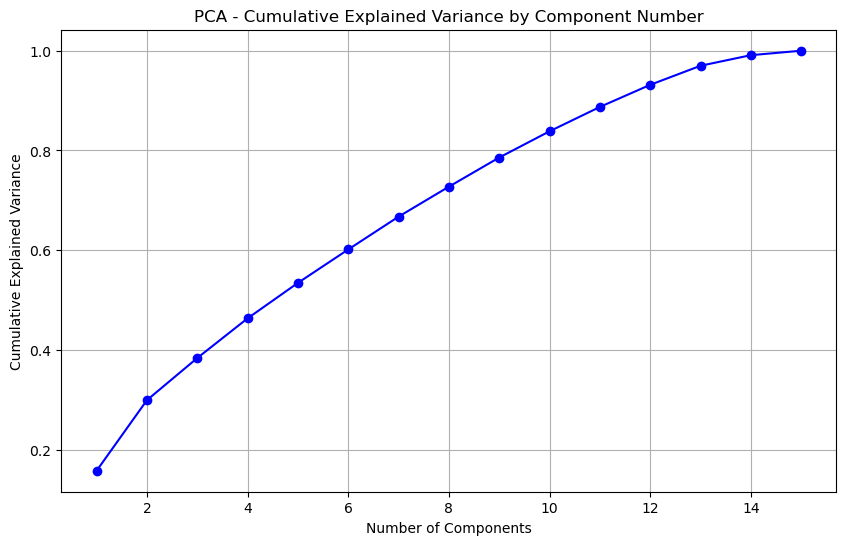

In [91]:
# Standardizing the features
scaler = StandardScaler()
df2_scaled = scaler.fit_transform(df2)

# Calculating PCA for different numbers of components and storing the explained variance ratio
variance_ratios = []
components_range = range(1, 16)  # Since we have 15 features, we'll test up to 16 components

for k in components_range:
    pca = PCA(n_components=k)
    pca.fit(df2_scaled)
    variance_ratios.append(sum(pca.explained_variance_ratio_))

# Plotting the cumulative explained variance against the number of components
plt.figure(figsize=(10, 6))
plt.plot(components_range, variance_ratios, marker='o', linestyle='-', color='b')
plt.title('PCA - Cumulative Explained Variance by Component Number')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

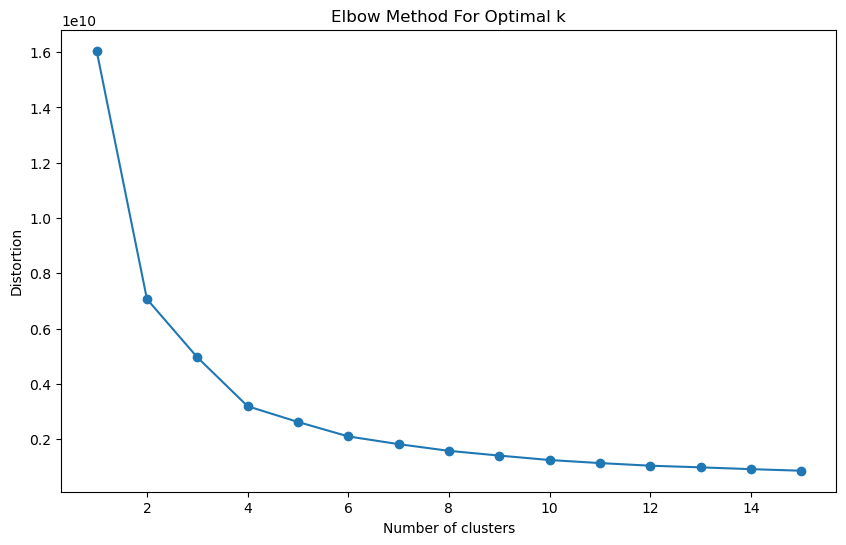

In [92]:
# Calculate distortion for a range of number of cluster
distortions = []
for i in range(1, 16):
    km = KMeans(n_clusters=i, random_state=0, n_init=10, max_iter=300)
    km.fit(df2)
    distortions.append(km.inertia_)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, 16), distortions, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

From the chart above, the optimal K = 3

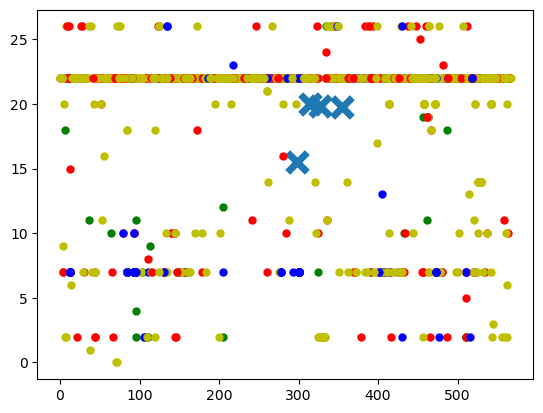

In [94]:
# Data
X = df2.values  # Convert DataFrame to numpy array
# Train K-means with k=3 and n_init is clearly defined
kmeans = KMeans(n_clusters=4, n_init=10)  
kmeans.fit(X)

# Predict labels of data points
labels = kmeans.predict(X)

# centroids of clusters
centers = kmeans.cluster_centers_

# Display results
colors = ['r.', 'b.', 'g.','y.']
for i in range(len(X)):
    plt.plot(X[i][0], X[i][1], colors[labels[i]], markersize=10)
plt.scatter(centers[:, 0], centers[:, 1], marker='x', s=200, linewidths=5)
plt.show()

In [96]:
# Add the labels to the DataFrame, adjusted to start at 1
new_df['Cluster'] = labels + 1

# Now DataFrame 'new_df' has a new column 'Cluster' with values 1, 2, and 3
new_df

,Journal,ArticleType,CitationCount,SJR Best Quartile,SJR,H index,TimeToRetraction,IsInternationalCollaboration,ArticleAge,IsPaywalled,LevelOfSeriousness,Subject,Institution,Publisher,Country,Author,Cluster
0,457,22,0,4.0,3.785518,338.990909,266,0,11849,1,0.0,0.456673,0.000225,0.134336,0.070049,0.000097,3
1,457,7,1,4.0,3.785518,338.990909,700,0,12185,1,3.0,0.456673,0.000225,0.134336,0.274809,0.000097,3
2,462,22,8,0.0,18.509000,1391.000000,903,0,12292,0,0.0,0.456673,0.000225,0.034927,0.070049,0.000097,3
3,6,18,0,2.0,0.542000,98.000000,367,0,11805,1,0.0,0.456673,0.000225,0.010210,0.021105,0.000097,3
4,518,22,2,4.0,3.785518,338.990909,457,0,11827,0,0.0,0.518099,0.000225,0.053197,0.105074,0.000097,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1856,542,22,0,4.0,3.785518,338.990909,161,0,2801,1,3.0,0.518099,0.000225,0.035465,0.016165,0.000180,4
1857,542,22,0,4.0,3.785518,338.990909,161,0,2801,1,3.0,0.518099,0.000225,0.035465,0.016165,0.000180,4
1858,395,7,0,0.0,0.822000,38.000000,1276,0,3916,0,1.0,0.395247,0.000225,0.000537,0.135159,0.000097,4
1859,454,22,0,1.0,0.984000,267.000000,1025,1,3652,0,0.0,0.518099,0.045236,0.000537,0.145936,0.000097,4


#### Save the new DataFrame to a new CSV file

In [97]:
new_df.to_csv('encoded_retractions_new_records_V10.csv', index=False)

Now, we have a new encoded dataset ready for predictive modeling.